# ${\color{pink}\mathbb{NAMES:}}$
1- ${\color{cyan}Yuval\ Kaver}$, id: 329

2- ${\color{cyan}Matan\ Ginzburg}$, id: 215

# Theoretical Part

Given a fundamental matrix $F$, let $(e,e')$ be the ordered pair of epipoles. Prove algebraically that we have:
$$
Fe = 0 , F^T e' = 0.
$$

Answer:
$$
Fe \sim [e']_x \overline{M_2} \overline{M_1}^{-1} (-\overline{M_1} \overline{M_2}^{-1} m2 + m1) = \\
=-[e']_x \overline{M_2} \overline{M_1}^{-1} \overline{M_1} \overline{M_2}^{-1} m2 + [e']_x \overline{M_2} \overline{M_1}^{-1}m1 = \\
=-[e']_x \overline{M_2} \overline{M_2}^{-1} m2 + [e']_x \overline{M_2} \overline{M_1}^{-1}m1 = \\
=-[e']_x m2  + [e']_x \overline{M_2} \overline{M_1}^{-1}m1 = \\
= [e']_x (\overline{M_2} \overline{M_1}^{-1}m1 - m2 ) = \\ 
= -[e']_x (-\overline{M_2} \overline{M_1}^{-1}m1 + m2 ) = -[e']_x e'= 0
$$
--------------
$$
F^Te' = ([e']_x \overline{M_2} \overline{M_1}^{-1})^Te' = \\
= (\overline{M_1}^{-T}\overline{M_2}^T[e']^T_x )e' = \\
 = (\overline{M_1}^{-T}\overline{M_2}^T[-e']_x )e' = \\
 = -\overline{M_1}^{-T}\overline{M_2}^T[e']_x e' = 0


$$


We used the identities:
$$
F = [e']_x \overline{M_2} \overline{M_1}^{-1}
\\
e \sim -\overline{M_1} \overline{M_2}^{-1} m2 + m1
\\
e' \sim -\overline{M_2} \overline{M_1}^{-1} m1 + m2
\\
because : [e']_x e' = 0
\\
[e']_x = -[e']^T_x
$$
----------------------------------------------------------------

$$
M_1o_1=0
\\
o_1 = \begin{pmatrix} v \\ u \end{pmatrix}  ,o_1 = \begin{pmatrix} v \\ 1 \end{pmatrix}  
$$
we can do this because its a projective point so we devide the last index

$$
M_1o_1=0
\\
[\overline{M_1},m_1]\begin{pmatrix} v \\ 1 \end{pmatrix} = \overline{M_1} v + m_1 = 0
\\
\overline{M_1} v =  -m_1
\\
v = -\overline{M_1}^{-1}m_1
\\
o_1 = \begin{pmatrix} -\overline{M_1}^{-1}m_1 \\ 1 \end{pmatrix}
\\
\\
e' \sim M_2o_1 = \begin{pmatrix} \overline{M_2} \\ m_2 \end{pmatrix} \begin{pmatrix} -\overline{M_1}^{-1}m_1 \\ 1 \end{pmatrix}  
=-\overline{M_2} \overline{M_1}^{-1}m_1 + m2
$$

Same thing for $e$ and $o_1$:
$$
M_2o_2=0
\\

o_2 = \begin{pmatrix} -\overline{M_2}^{-1}m_2 \\ 1 \end{pmatrix}
\\
\\
e \sim M_1o_2 = \begin{pmatrix} \overline{M_1} \\ m_1 \end{pmatrix} \begin{pmatrix} -\overline{M_2}^{-1}m_2 \\ 1 \end{pmatrix}  
=-\overline{M_1} \overline{M_2}^{-1}m_2 + m1
$$





# Programing Part

In [1]:
import numpy as np
import scipy

In [2]:
def normalization_matrix(p):
    '''
    Given a nx2 matrix, compute the normalization matrix. 
    '''
    avg_x, avg_y, _ = np.mean(p,axis=0)
    std_x, std_y, _ = np.std(p,axis=0)
    T = np.array([
        [1/std_x,0,-avg_x/std_x],
        [0,1/std_y,-avg_y/std_y],
        [0,      0,          1]
    ])
    return T

def normalized_8points_algorithm(p1,p2):
    '''
    Given 2 nx2 matrices of matching points, compute the fundamental matrix using the normalized 8 points algorithm. 
    '''
    # p1 = np.hstack((p1,np.ones((len(p1),1))))
    # p2 = np.hstack((p2,np.ones((len(p2),1))))
    T1 = normalization_matrix(p1)       #p2.T@F@p1 = 0
    T2 = normalization_matrix(p2)
    q1 = np.array(p1)
    q2 = np.array(p2)

    q1 = (T1@p1.T).T 
    q2 = (T2@p2.T).T


    A = np.zeros((p1.shape[0],9))           # A -> M(nx9)
    for i in range(p1.shape[0]):
        A[i] = np.array ([
         [ q2[i][0]*q1[i][0] , q2[i][0]*q1[i][1] , q2[i][0] ,
          q2[i][1]*q1[i][0] , q2[i][1]*q1[i][1] , q2[i][1] ,
          q1[i][0] , q1[i][1],1] 
         ])

    ATME = A.T@A  #
    U , _ , __= np.linalg.svd(ATME)
    F2 = np.reshape(U[:,-1],(3,3))  #last amuda in A...


    U , sigma , V= np.linalg.svd(F2)
    sigma = np.diag(sigma)
    sigma[2,2] = 0          #we force rank of F to be 2
    F = U@sigma@V       # Back to F...
    return T2.T@F@T1 

In [3]:
def pick8points(n):
    indexes = np.random.randint(0,n,8)
    return indexes

In [4]:
def geometric_error(F,p1,p2):
    F = np.reshape(F,(3,3))
    Error = 0
    if p1.shape[1] == 2:
        p1 = np.hstack((p1,np.ones((p1.shape[0],1))))
        p2 = np.hstack((p2,np.ones((p2.shape[0],1))))
    Fp1 = (F@p1.T).T
    Fp2 = (F@p2.T).T
    for i in range(len(p1)):
        denom = (Fp1[i][0])**2+(Fp1[i][1])**2+(Fp2[i][0])**2+(Fp2[i][1])**2
        numirator = (p2[i].T@Fp1[i])**2
        Error += numirator/denom
    return Error

In [5]:
def single_point_geometric_error(F,p1,p2):
    # A = np.reshape(F,(3,3))
    Error = 0   
    Fp1 = F@p1 
    Fp2 = F.T@p2
    denom = (Fp1[0])**2+(Fp1[1])**2+(Fp2[0])**2+(Fp2[1])**2
    numirator = (p2.T@Fp1)**2
    Error += numirator/denom
    return Error

In [6]:
def refine_F(F,p1,p2):
    '''
    Given 2 nx2 matrices of matching points and a first guess of the fundamental matrix, the function refines the fundamental matrix through the minimization of the geometric error.
    '''
    F_flatten = np.matrix.flatten(F)
    F_refined = scipy.optimize.least_squares(geometric_error,x0=F_flatten,args=(p1,p2))
    F= F_refined.x.reshape((3,3))
    U , sigma , V= np.linalg.svd(F)
    sigma = np.diag(sigma)
    sigma[2,2] = 0          #we force rank of F to be 2
    F = U@sigma@V       # Back to F...
    return F

In [7]:
def ransac_fundamental_matrix(p1,p2,epsilon=2,N=5000):
    '''
    Given 2 nx2 matrices of matching points, the function computes the fundamental matrix, as well as a list of correct matches, using the RANSAC procedure.    
    '''
    p1 = np.hstack((p1,np.ones((p1.shape[0],1))))
    p2 = np.hstack((p2,np.ones((p2.shape[0],1))))
    
    best_F = np.zeros((3,3))
    max_correct_points = 0
    correct_points = 0
    n = p1.shape[0]
    points1 = np.zeros((8,3))
    points2 = np.zeros((8,3))
    for i in range(N):
        rand_points=pick8points(n)
        for j in range(8):
            points1[j] = p1[rand_points[j]]
            points2[j] = p2[rand_points[j]]
        F = normalized_8points_algorithm(points1,points2)
        for j in range(n):
            if (single_point_geometric_error(F,p1[j],p2[j])<epsilon):
                correct_points+=1
        if correct_points>max_correct_points:
            max_correct_points = correct_points
            best_F = F
        correct_points = 0 
    matching_points = np.zeros(p1.shape[0],dtype=bool)
    for i in range(n):
        if (single_point_geometric_error(best_F,p1[i],p2[i])<epsilon):
            matching_points[i] = True
    return best_F, matching_points

# Experiment Part

In [8]:
import numpy as np
from skimage import data
from skimage.color import rgb2gray
from skimage.feature import match_descriptors, ORB, plot_matches
from skimage.measure import ransac
from skimage.transform import FundamentalMatrixTransform
import matplotlib.pyplot as plt

Number of matches: 223
Number of inliers: 162


C:\Users\matan\AppData\Local\Temp\ipykernel_16528\3595053093.py:52: FutureWarning: `plot_matches` is deprecated since version 0.23 and will be removed in version 0.25. Use `skimage.feature.plot_matched_features` instead.
  plot_matches(


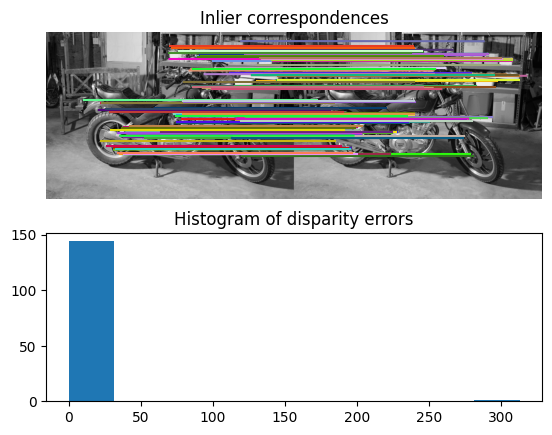

In [ ]:
img_left, img_right, groundtruth_disp = data.stereo_motorcycle()
img_left, img_right = map(rgb2gray, (img_left, img_right))

# Find sparse feature correspondences between left and right image.

descriptor_extractor = ORB()

descriptor_extractor.detect_and_extract(img_left)
keypoints_left = descriptor_extractor.keypoints
descriptors_left = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img_right)
keypoints_right = descriptor_extractor.keypoints
descriptors_right = descriptor_extractor.descriptors

matches = match_descriptors(descriptors_left, descriptors_right, cross_check=True)

print(f'Number of matches: {matches.shape[0]}')

# Estimate the epipolar geometry between the left and right image.
random_seed = 9
rng = np.random.default_rng(random_seed)

# Computation of F through SCIKIT-IMAGE
model, inliers = ransac(
    (keypoints_left[matches[:, 0]], keypoints_right[matches[:, 1]]),
    FundamentalMatrixTransform,
    min_samples=8,
    residual_threshold=1,
    max_trials=5000,
    rng=rng,
)
inlier_keypoints_left = keypoints_left[matches[inliers, 0]]
inlier_keypoints_right = keypoints_right[matches[inliers, 1]]

print(f'Number of inliers: {inliers.sum()}')

# Compare estimated sparse disparities to the dense ground-truth disparities.

disp = inlier_keypoints_left[:, 1] - inlier_keypoints_right[:, 1]
disp_coords = np.round(inlier_keypoints_left).astype(np.int64)
disp_idxs = np.ravel_multi_index(disp_coords.T, groundtruth_disp.shape)
disp_error = np.abs(groundtruth_disp.ravel()[disp_idxs] - disp)
disp_error = disp_error[np.isfinite(disp_error)]

# Visualize the results.

fig, ax = plt.subplots(nrows=2, ncols=1)

plt.gray()

plot_matches(
    ax[0],
    img_left,
    img_right,
    keypoints_left,
    keypoints_right,
    matches[inliers],
    only_matches=True,
)
ax[0].axis("off")
ax[0].set_title("Inlier correspondences")

ax[1].hist(disp_error)
ax[1].set_title("Histogram of disparity errors")
plt.show()

In [ ]:
# Local Computation of F
#F = ransac_fundamental_matrix(????)
#Compute the norm of the difference between your F and SKIMAGE F.
#Refine your F using geometric error minimization.
#Compute the norm of the difference between your refined F and SKIMAGE F.
#Compare the geometric error of your refined F and the geometric error of SKIMAGE F.

img_left, img_right, groundtruth_disp = data.stereo_motorcycle()
img_left, img_right = map(rgb2gray, (img_left, img_right))
descriptor_extractor = ORB()
descriptor_extractor.detect_and_extract(img_left)
keypoints_left = descriptor_extractor.keypoints
descriptor_extractor.detect_and_extract(img_right)
keypoints_right = descriptor_extractor.keypoints
model, inliers = ransac(
    (keypoints_left[matches[:, 0]], keypoints_right[matches[:, 1]]),
    FundamentalMatrixTransform,
    min_samples=8,
    residual_threshold=1,
    max_trials=5000,
    rng=rng,
)
model_our, inliers_our = ransac_fundamental_matrix(keypoints_left[matches[:, 0]], keypoints_right[matches[:, 1]])
inlier_keypoints_left = keypoints_left[matches[inliers, 0]]
inlier_keypoints_right = keypoints_right[matches[inliers, 1]]
model_refined = refine_F(model_our,inlier_keypoints_left,inlier_keypoints_right)

In [ ]:
norm_ski = model.params/np.linalg.norm(model.params)
norm_us = model_our/np.linalg.norm(model_our)
norm_refined = model_refined/np.linalg.norm(model_refined)
print("norm of diffrance = ",np.linalg.norm(norm_ski-norm_us))
print("geometric_error of our F = ",geometric_error(model_our,inlier_keypoints_left,inlier_keypoints_right))
print("rank of our F = ",np.linalg.matrix_rank(model_our))
print("the refined error is",geometric_error(model_refined,inlier_keypoints_left,inlier_keypoints_right))
print("norm of diffrance = ",np.linalg.norm(norm_ski-norm_refined))

norm of diffrance =  0.21514310652894808
geometric_error of our F =  108.00042795590477
rank of our F =  2
the refined error is 108.00042795586724
norm of diffrance =  0.21514310652894794


Number of matches: 223
Number of inliers: 170


C:\Users\matan\AppData\Local\Temp\ipykernel_16528\1228334920.py:41: FutureWarning: `plot_matches` is deprecated since version 0.23 and will be removed in version 0.25. Use `skimage.feature.plot_matched_features` instead.
  plot_matches(


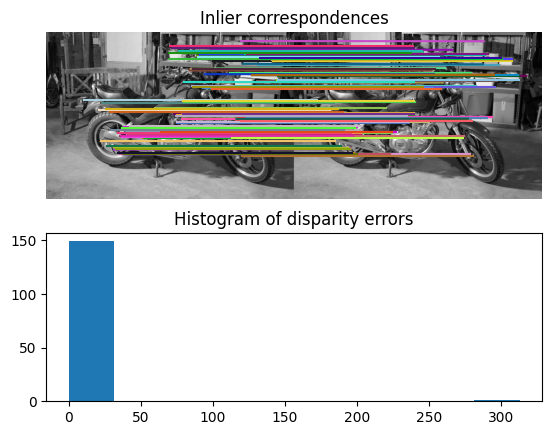

In [ ]:
# Draw the true matching obtained by your RANSAC algorithm.
img_left, img_right, groundtruth_disp = data.stereo_motorcycle()
img_left, img_right = map(rgb2gray, (img_left, img_right))

# Find sparse feature correspondences between left and right image.

descriptor_extractor = ORB()

descriptor_extractor.detect_and_extract(img_left)
keypoints_left = descriptor_extractor.keypoints
descriptors_left = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img_right)
keypoints_right = descriptor_extractor.keypoints
descriptors_right = descriptor_extractor.descriptors

matches = match_descriptors(descriptors_left, descriptors_right, cross_check=True)

print(f'Number of matches: {matches.shape[0]}')

model, inliers = ransac_fundamental_matrix(keypoints_left[matches[:, 0]], keypoints_right[matches[:, 1]])
inlier_keypoints_left = keypoints_left[matches[inliers, 0]]
inlier_keypoints_right = keypoints_right[matches[inliers, 1]]

print(f'Number of inliers: {inliers.sum()}')

# Compare estimated sparse disparities to the dense ground-truth disparities.

disp = inlier_keypoints_left[:, 1] - inlier_keypoints_right[:, 1]
disp_coords = np.round(inlier_keypoints_left).astype(np.int64)
disp_idxs = np.ravel_multi_index(disp_coords.T, groundtruth_disp.shape)
disp_error = np.abs(groundtruth_disp.ravel()[disp_idxs] - disp)
disp_error = disp_error[np.isfinite(disp_error)]

# Visualize the results.

fig, ax = plt.subplots(nrows=2, ncols=1)

plt.gray()

plot_matches(
    ax[0],
    img_left,
    img_right,
    keypoints_left,
    keypoints_right,
    matches[inliers],
    only_matches=True,
)
ax[0].axis("off")
ax[0].set_title("Inlier correspondences")

ax[1].hist(disp_error)
ax[1].set_title("Histogram of disparity errors")
plt.show()

# Projective Reconstruction

Using the two images provided by SKIMAGE, perform a projective reconstruction of your valid matching points. 
Draw the reconstruction in 3D using matplotlib.

$p = \begin{pmatrix} u \\ v \\ 1 \end{pmatrix},
p' = \begin{pmatrix} u' \\ v' \\ 1 \end{pmatrix}
P = \begin{pmatrix} x \\ y \\ z \\ t \end{pmatrix} \\[3mm]
[[e']_x F , e'] = \begin{pmatrix} \longleftarrow w_1 \longrightarrow \\ \longleftarrow w_2 \longrightarrow \\ \longleftarrow w_3 \longrightarrow \end{pmatrix} 
\hspace{2cm} w_1,w_2,w_3 \in {\mathbb{R^4}}
\\[5mm]
\text{our equations are:}\\[2mm] 
\left\{
  \begin{array}{l}
    p \sim \begin{bmatrix} I , 0 \end{bmatrix} P \\[2mm]
    p' \sim \begin{bmatrix} [e']_x F , e' \end{bmatrix} P
  \end{array}
\right. \\[5mm]
\text{we then get two pairs of three equations.}\\[2mm] 
\text{however, because it is equal to scale, we divide the first two equations by the third one for each pair and get:} \\[5mm]
\left\{
  \begin{array}{l}
    uz-x=0\\[2mm]
    vz-y=0\\[2mm]
    u'w_3P - w_1P = 0\\[2mm]
    v'w_3P - w_2P = 0\\[2mm]
  \end{array}
\right. \\[5mm]
A = \begin{bmatrix} -1,0,u,0 \\ 0,-1,v,0 \\ 
u'w_3 - w_1 \\ v'w_3 - w_2 \end{bmatrix} \\[5mm]
\text{then   } AP=0
\text{so we do the minimization problem:}\\[5mm]
argmin \hspace{1mm} ||AX||^2\\||x||=1
$

In [ ]:
def vector_mult_matrix(v):
    return np.array([[0,-v[2],v[1]],
                     [v[2],0,-v[0]],
                     [-v[1],v[0],0]])

In [ ]:
def reprojective_min_func(F,pixel1,pixel2):
    A = np.zeros((4,4))
    epipolar = scipy.linalg.null_space(F).T
    vector_mult_e = vector_mult_matrix(epipolar[0])
    M2 = np.hstack((vector_mult_e@F,epipolar.T))
    A[0] = [-1,0,pixel1[0],0]
    A[1] = [0,-1,pixel1[1],0]
    A[2] = pixel2[0]*M2[2] - M2[0]
    A[3] = pixel2[1]*M2[2] - M2[1]
    ATME = A.T@A
    U , _ , __= np.linalg.svd(ATME)
    P = U[:,-1]
    return P

In [ ]:
#matching points in motorcycle
%matplotlib tk 
img_left, img_right, groundtruth_disp = data.stereo_motorcycle()
img_left, img_right = map(rgb2gray, (img_left, img_right))
descriptor_extractor = ORB()
descriptor_extractor.detect_and_extract(img_left)
keypoints_left = descriptor_extractor.keypoints
descriptor_extractor.detect_and_extract(img_right)
keypoints_right = descriptor_extractor.keypoints
matches = match_descriptors(descriptors_left, descriptors_right, cross_check=True)
print(f'Number of matches: {matches.shape[0]}')

F, inliers = ransac_fundamental_matrix(keypoints_left[matches[:, 0]], keypoints_right[matches[:, 1]])
inlier_keypoints_left = keypoints_left[matches[inliers, 0]]
inlier_keypoints_right = keypoints_right[matches[inliers, 1]]

Number of matches: 223


In [ ]:
#This is motorcycle
P = np.zeros((inlier_keypoints_left.shape[0],4))
for i in range(inlier_keypoints_left.shape[0]):
    P[i] = reprojective_min_func(F,inlier_keypoints_left[i],inlier_keypoints_right[i])
    P[i] = P[i]/P[i][3]
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(P[:,0], P[:,1], P[:,2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()